# Note



### 1. 일간 vs 주간

### 2. 초깃값 설정
지금은 $ E[\theta_t] + \sigma[\theta_t]$

### 3. EWMA
   $\text{weight} = \frac{2}{ \text{window} + 2 }$
   
### 4. threshold

### Note

+ Volume bar 에서 $P[b_t = 1]$ 도 EWMA 를 적용해야하는가?
+ Jupyter에서 Multi Processing이 아예 안되는가?

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from bars import TIB,VIB,DIB

from tqdm import tqdm

import multiprocessing as mp

In [2]:
path = 'MiniKospi/'
list_file = os.listdir(path)
list_file.sort()
data = pd.DataFrame(columns=['close','volume']) 
data.index.names = ['timestamp']
cnt=0
for file in tqdm(list_file) :
    tmp = pd.read_csv(path+file,index_col=0)
    tmp = tmp.drop(columns=['date','time','sell','buy'])
    tmp.index = pd.to_datetime(tmp.index)
    tmp.index.names = ['timestamp']
    data = data.append(tmp)
    cnt+=1
    if cnt > 3: break;
weekly = [g for n, g in data.groupby(pd.Grouper(level='timestamp', freq='W'))]

 27%|██████████████████████▋                                                            | 3/11 [00:09<00:32,  4.08s/it]

```python
def TIB(weekly_data,threshold=5000,index='timestamp',column='close'): 
def VIB(weekly_data,threshold=20000,index='timestamp',col_price='close',col_volume='volume'):
def DIB(weekly_data,threshold=200000,index='timestamp',col_price='close',col_volume='volume'):        
```

In [3]:
tick = TIB(weekly)
volume = VIB(weekly)
dollar = DIB(weekly)

TIB start
VIB start
DIB start


In [ ]:
dollar = DIB(weekly,threshold=8000000)

DIB start


In [ ]:
#tick.to_csv('tick_t5K.csv')
#volume.to_csv('volume_t20K.csv')
dollar.to_csv('dollar_t8M.csv')

In [ ]:
print('size of tick ' + str(tick.index.size))
print('size of volume ' + str(volume.index.size))
print('size of dollar ' + str(dollar.index.size))

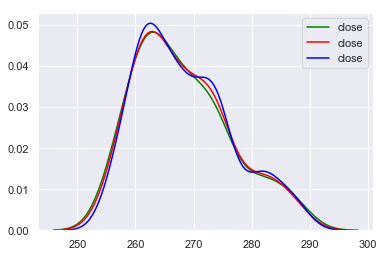

In [13]:
fig, ax = plt.subplots()
sns.kdeplot(tick['close'], color="green")
sns.kdeplot(volume['close'],  color="red")
sns.kdeplot(dollar['close'], color="blue")
plt.show()

,close,return,return
timestamp,,,
2018-12-03 13:02:00,276.880005,0.004134,0.004134
2018-12-04 09:26:00,275.480011,-0.005056,-0.005056
2018-12-04 11:57:00,274.440002,-0.003775,-0.003775
2018-12-04 14:54:00,272.279999,-0.007871,-0.007871
2018-12-05 09:31:00,270.540009,-0.006390,-0.006390


,close,return
timestamp,,
2018-12-03 11:14:00,276.760010,0.005303
2018-12-03 14:53:00,276.600006,-0.000578
2018-12-04 09:33:00,275.079987,-0.005495
2018-12-04 12:22:00,274.220001,-0.003126
2018-12-04 14:43:00,272.359985,-0.006783


,close,return
timestamp,,
2018-12-03 09:23:00,273.959991,-0.004723
2018-12-03 09:43:00,275.540009,0.005767
2018-12-03 10:12:00,276.359985,0.002976
2018-12-03 10:49:00,275.820007,-0.001954
2018-12-03 11:48:00,276.799988,0.003553


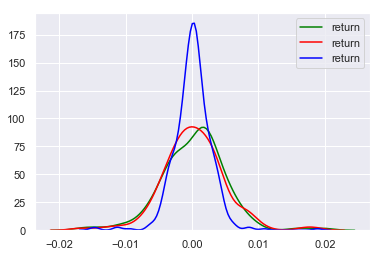

In [15]:
tick['return'] = tick['close'].pct_change()
volume['return'] = volume['close'].pct_change()
dollar['return'] = dollar['close'].pct_change()

tick = tick.dropna()
volume = volume.dropna()
dollar = dollar.dropna()

fig, ax = plt.subplots()
sns.kdeplot(tick['return'], color="green")
sns.kdeplot(volume['return'],  color="red")
sns.kdeplot(dollar['return'], color="blue")
plt.show()

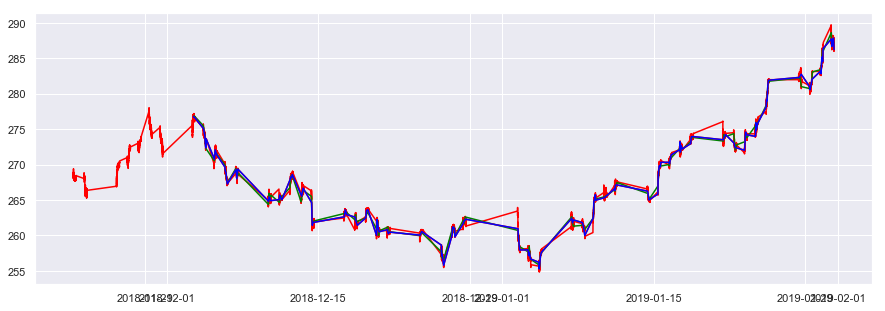

In [17]:
 fig, ax1 = plt.subplots()

#plt.plot(data_day.index, data_day['close'],color='#ff0000')
plt.plot(data.index, data['close'],color='#ff0000')
# df_corr = data_day[data_day.columns[0]]
# print(df_corr.autocorr)

''' ax2 = ax2.bar(tick_temp.index, tick_temp['dummy'],color='#5d8c70')'''
#ax2 = ax2.plot(tick.index, tick['close'],color='#5d8c70')
plt.plot(tick.index, tick['close'],color='green')

plt.plot(volume.index, volume['close'],color='red')
plt.plot(volume.index, volume['close'],color='blue')
fig.set_figwidth(15)
fig.set_figheight(5)
plt.show()